In [1]:
from google.colab import files
data_to_load = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(data_to_load['diabetes.csv']))

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**There are Pregnecies,Glucose,BloodPressure,SkinThickness,Insuline,BMI,DPF,Age and outcome 9 columns**

In [7]:
df.shape

(768, 9)

**And 768 rows of Data. All the data here are numerical and last column is a classification which says weather the person have or doesnt have diabetes.**

The dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database

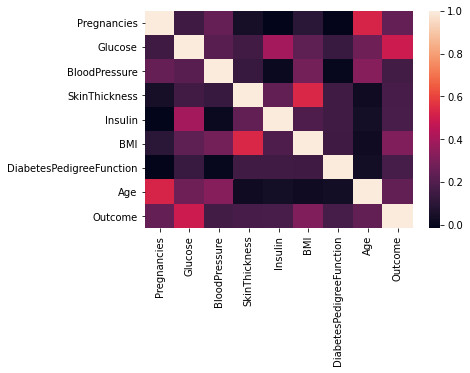

In [84]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**This is a interactive correlation map which gives the correlation between the different columns, here maximum correlation is between pregnancies and age and least for pregnancies and skin thickness**

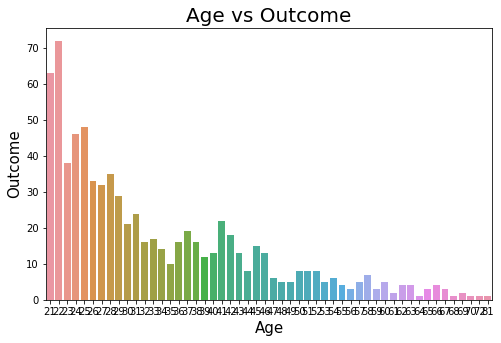

In [30]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(x=df['Age'])
plt.title('Age vs Outcome',fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Outcome',fontsize=15);

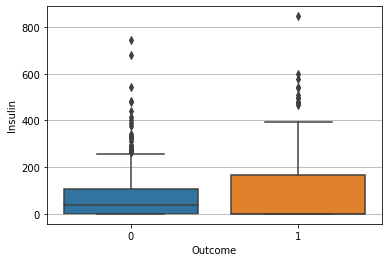

In [31]:
sns.boxplot(x='Outcome',y='Insulin',data=df)
plt.grid(axis='y')
plt.show()

In [36]:
for i in df.columns:
    print(f'No.of zero values in {i}:',df[df[i]==0].shape[0])


No.of zero values in Pregnancies: 111
No.of zero values in Glucose: 5
No.of zero values in BloodPressure: 35
No.of zero values in SkinThickness: 227
No.of zero values in Insulin: 374
No.of zero values in BMI: 11
No.of zero values in DiabetesPedigreeFunction: 0
No.of zero values in Age: 0
No.of zero values in Outcome: 500


**Here we can see the most number of zeros are in Insulin column**

In [42]:
df_t = df.drop(['Outcome'], axis= 1)
df_outcome = df['Outcome']

df = pd.read_csv('diabetes.csv',na_values=0)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy='mean')
imputer = imputer.fit(df)
print("Original data: \n",df)
data = imputer.transform(df)
print("Imputed Data:\n",data)
 
df = pd.concat([df_t, df_outcome], axis= 1, join= 'inner')
df.head()

Original data: 
      Pregnancies  Glucose  ...  Age  Outcome
0            6.0    148.0  ...   50      1.0
1            1.0     85.0  ...   31      NaN
2            8.0    183.0  ...   32      1.0
3            1.0     89.0  ...   21      NaN
4            NaN    137.0  ...   33      1.0
..           ...      ...  ...  ...      ...
763         10.0    101.0  ...   63      NaN
764          2.0    122.0  ...   27      NaN
765          5.0    121.0  ...   30      NaN
766          1.0    126.0  ...   47      1.0
767          1.0     93.0  ...   23      NaN

[768 rows x 9 columns]
Imputed Data:
 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      1.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      1.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      1.   ]]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000,148.0,72.0,35.000,79.799,33.6,0.627,50,1
1,1.000,85.0,66.0,29.000,79.799,26.6,0.351,31,0
2,8.000,183.0,64.0,20.536,79.799,23.3,0.672,32,1
3,1.000,89.0,66.0,23.000,94.000,28.1,0.167,21,0
4,3.845,137.0,40.0,35.000,168.000,43.1,2.288,33,1


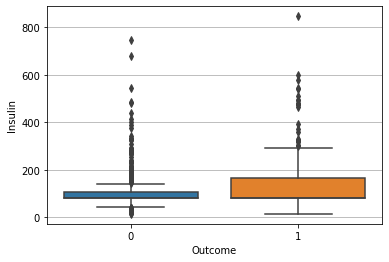

In [43]:
sns.boxplot(x='Outcome',y='Insulin',data=df)
plt.grid(axis='y')
plt.show()

##MLP

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

X, y = df.values[:, :-1], df.values[:, -1]

In [48]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(514, 8) (254, 8) (514,) (254,)


In [50]:
n_features = X_train.shape[1]

In [68]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

In [69]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
model.fit(X_train, y_train, epochs=700, batch_size=32, verbose=0)

In [77]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.701


In [78]:
import numpy as np
row = np.array([[ 0.   , 137.   ,  40.   ,  35.   , 168.   ,  43.1  ,   2.288,
        33.  ]])

yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

Predicted: 0.780


In [79]:
import numpy as np

row1=np.array([[ 0.   , 137.   ,  40.   ,  35.   , 168.   ,  43.1  ,   2.288,
        33.]])
row1.shape

(1, 8)

In [80]:
yhat = model.predict([row1])
print('Predicted: %.3f' % yhat)

Predicted: 0.780


In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [82]:
from keras.utils.vis_utils import plot_model

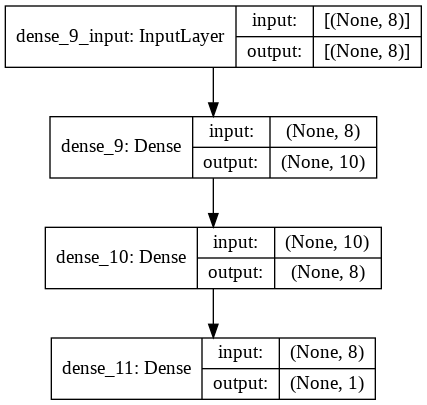

In [83]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)